In [299]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [300]:
!pip install dagshub mlflow scikit-learn

In [301]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [302]:
train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [303]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [304]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


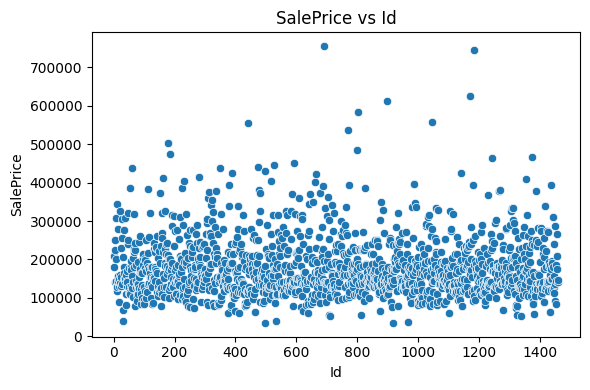

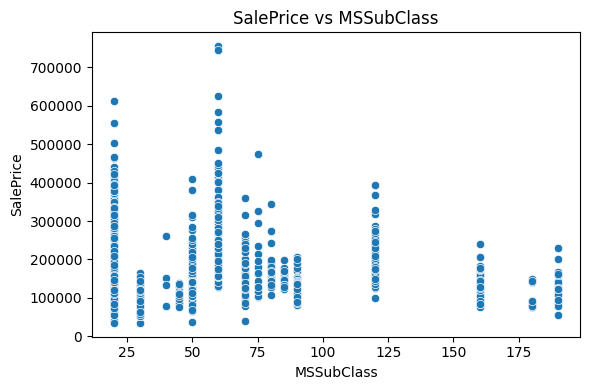

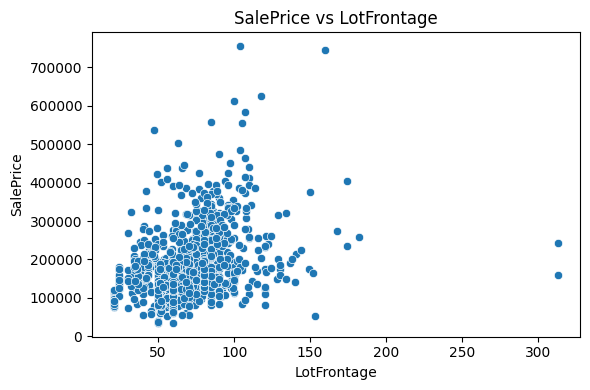

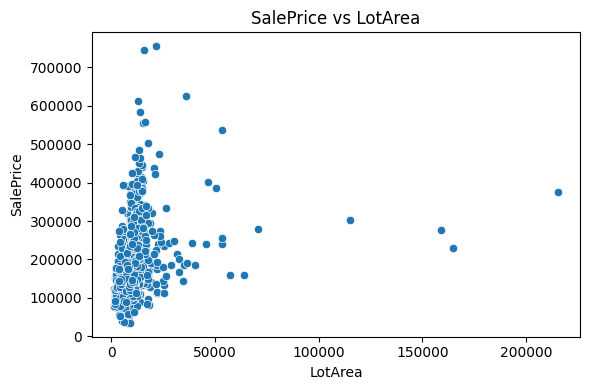

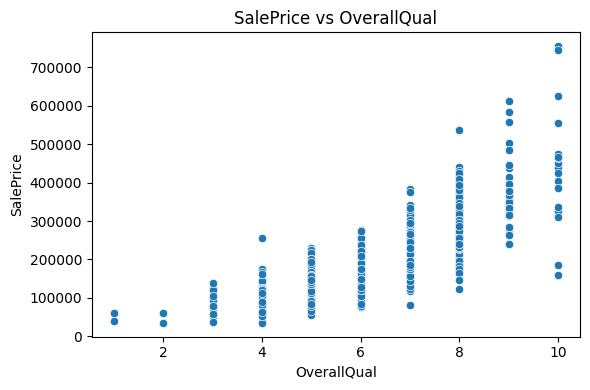

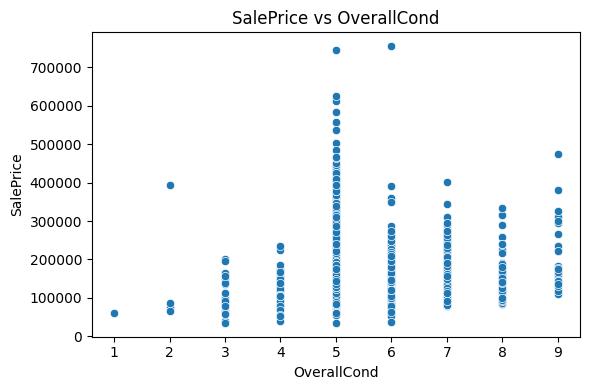

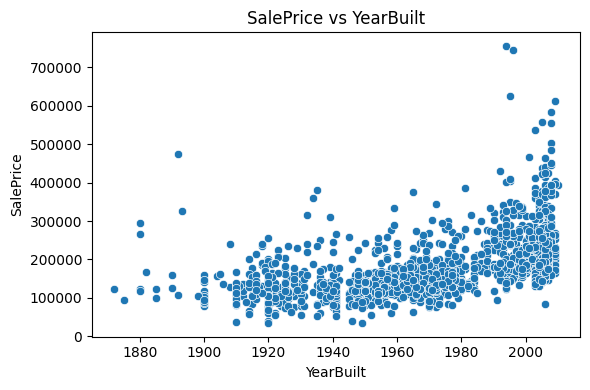

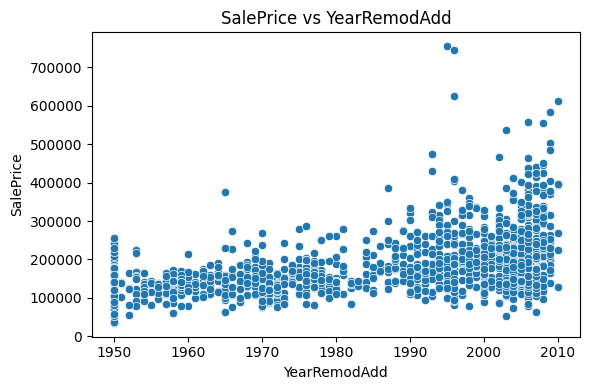

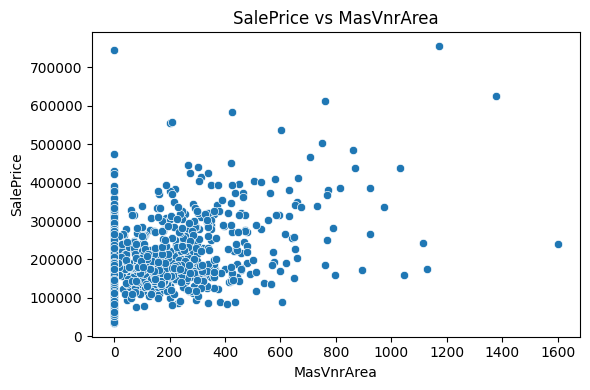

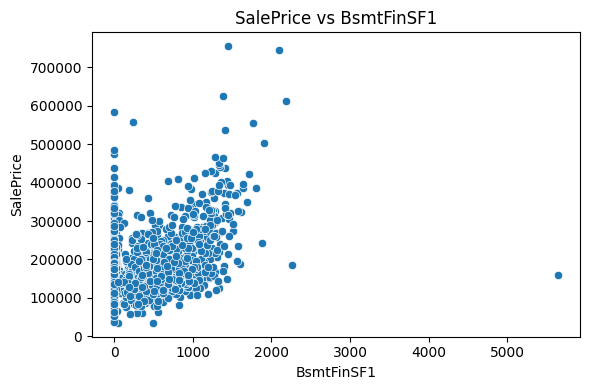

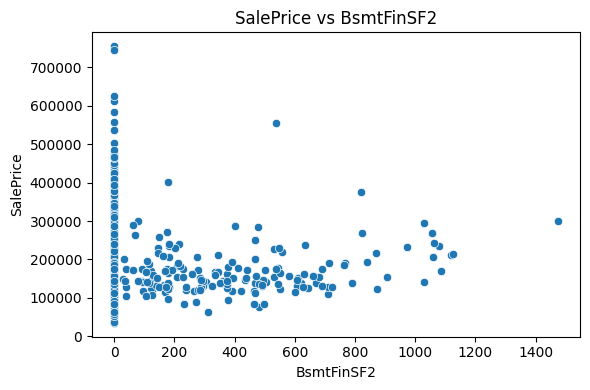

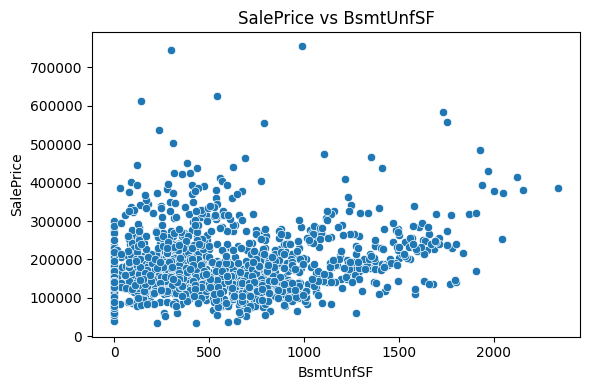

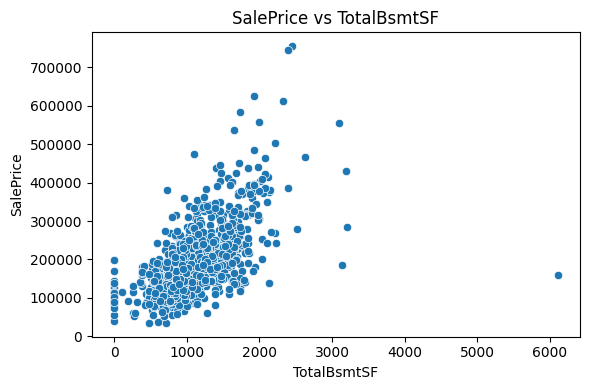

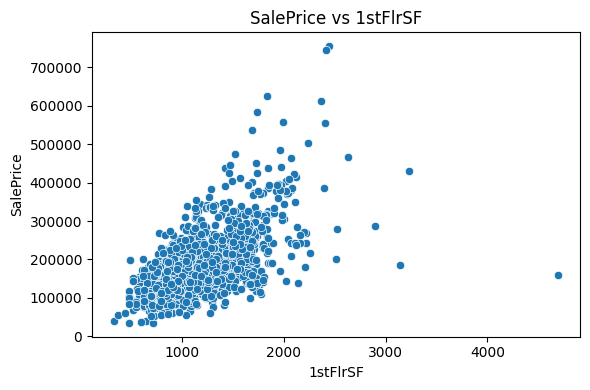

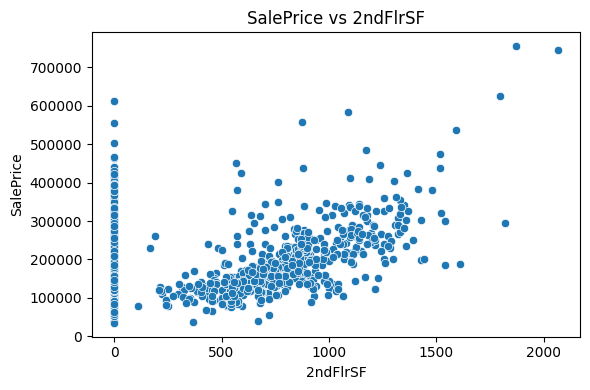

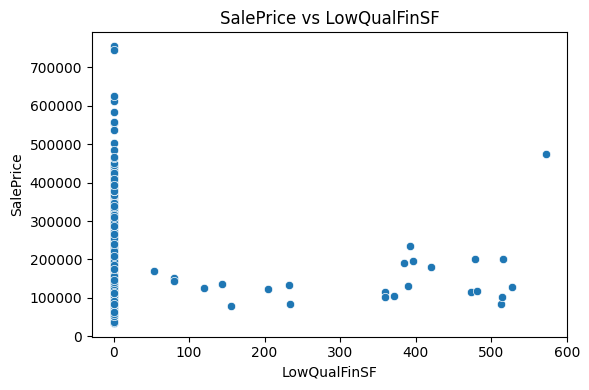

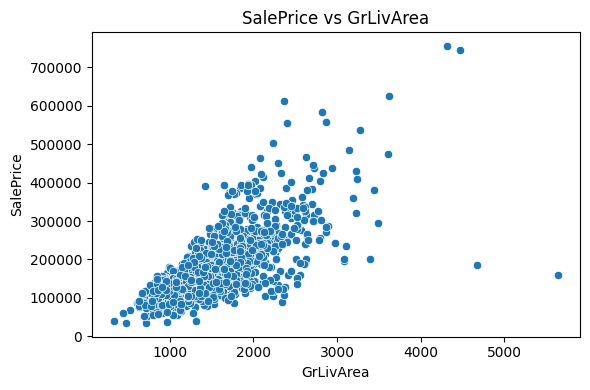

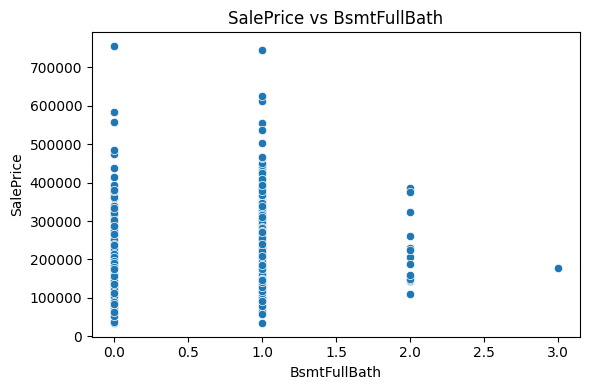

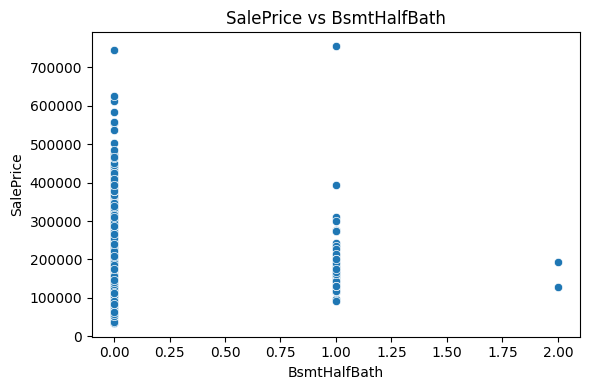

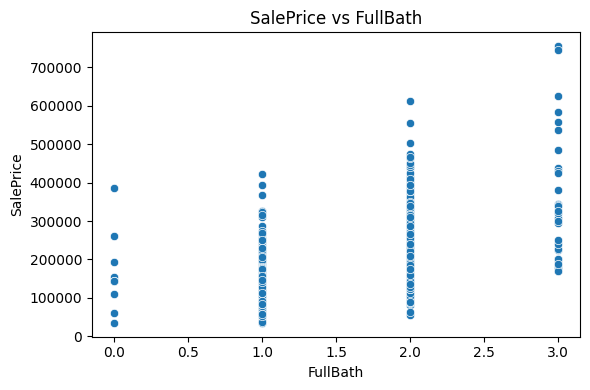

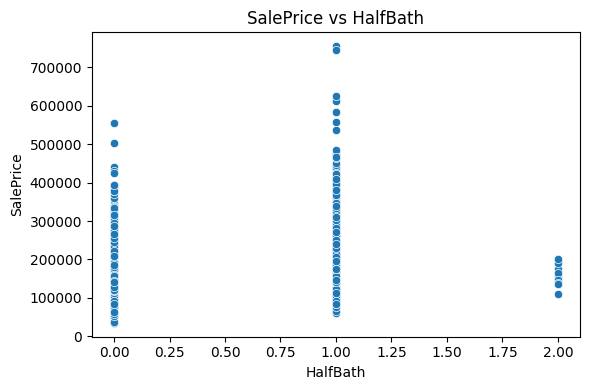

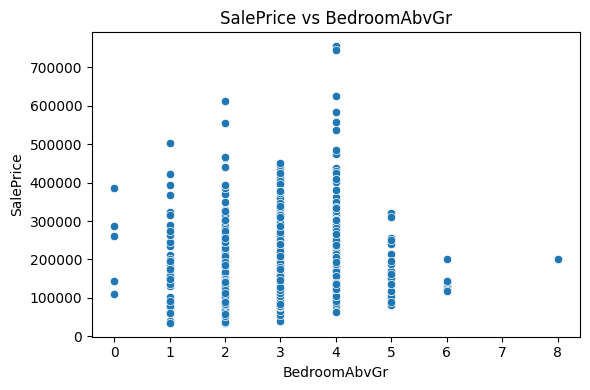

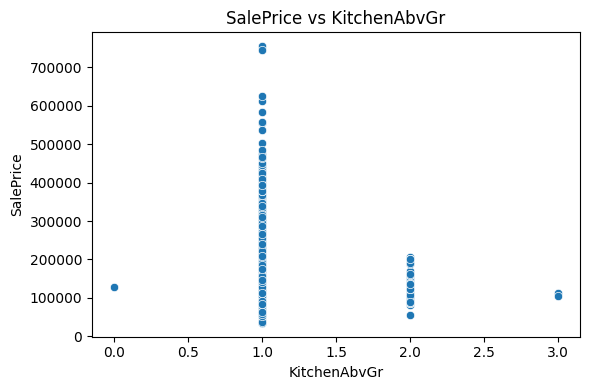

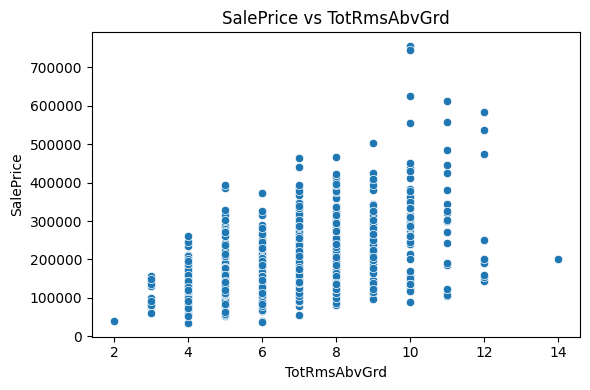

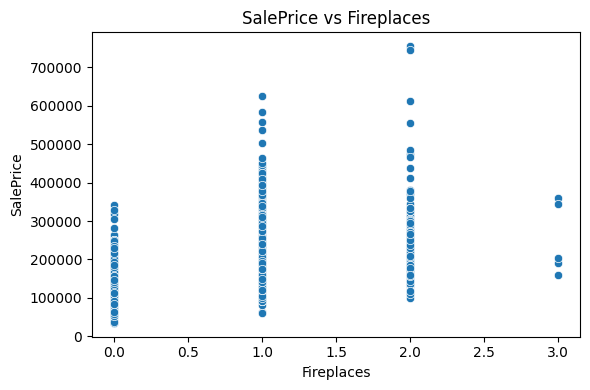

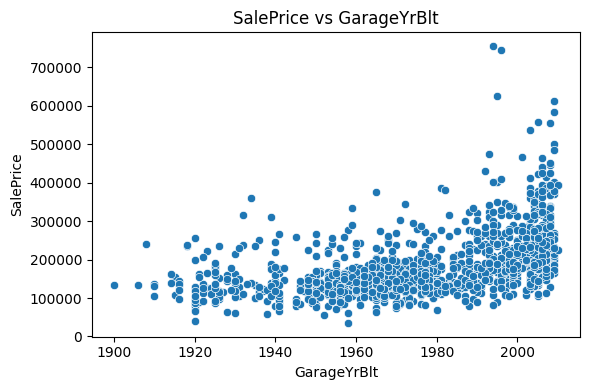

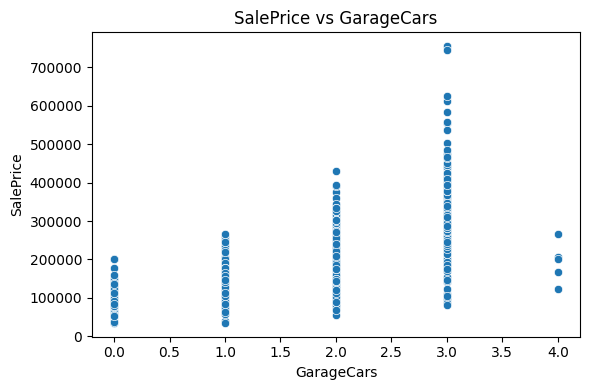

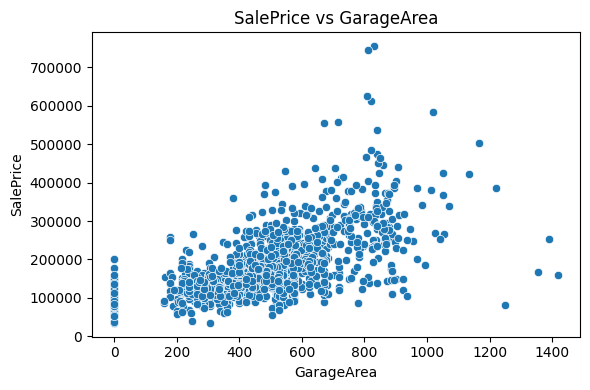

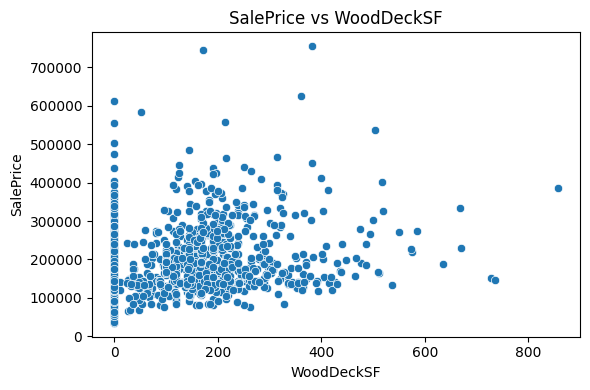

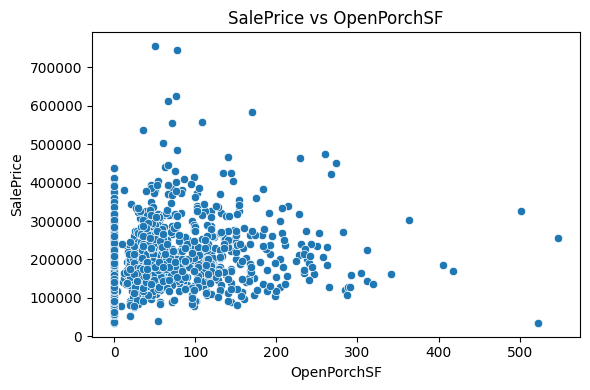

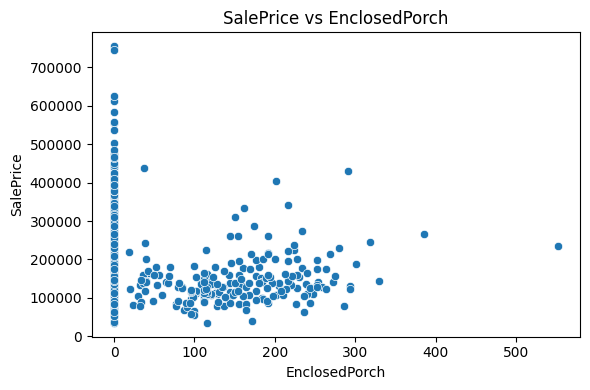

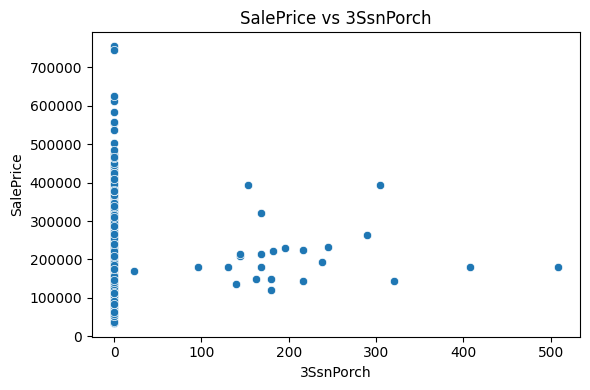

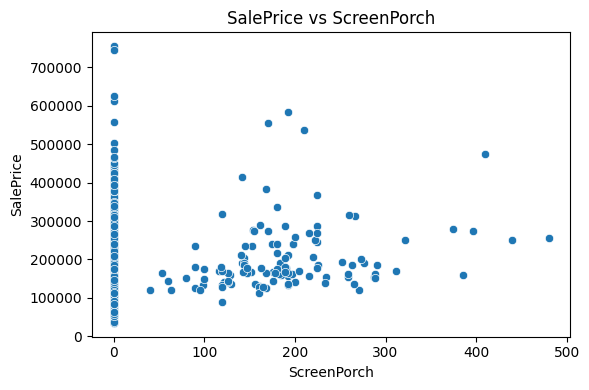

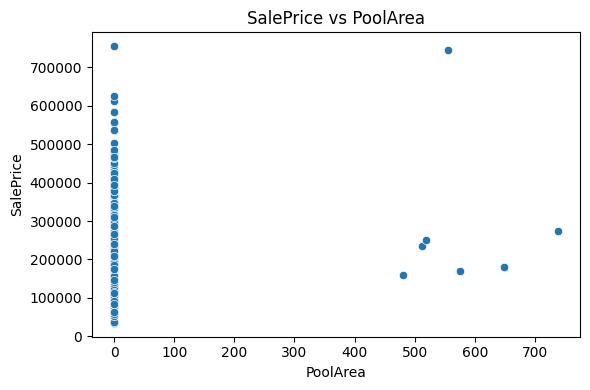

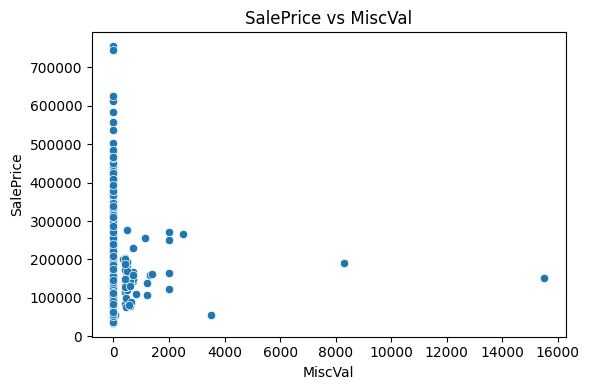

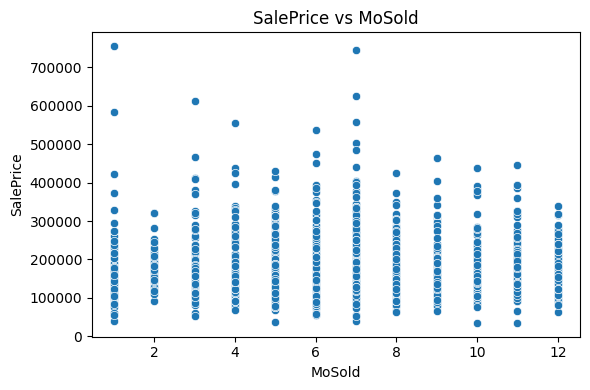

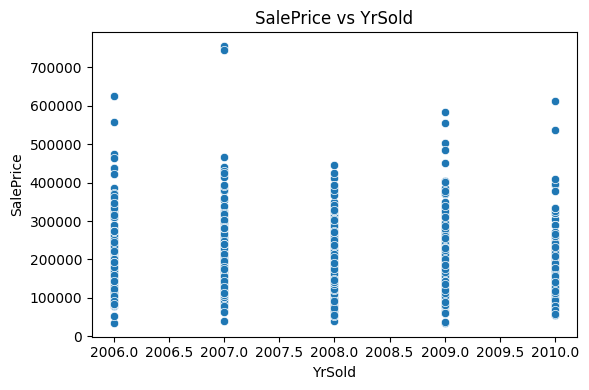

In [305]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

numeric_features = train_data.select_dtypes(include=['int64', 'float64']).columns
numeric_features = [col for col in numeric_features if col != 'SalePrice']

for col in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=col, y='SalePrice', data=train_data)
    plt.title(f'SalePrice vs {col}')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.tight_layout()
    plt.show()

In [306]:
def handle_missing_values(df):
    df = df.copy()
    
    # Fill missing values for numerical features
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in num_cols:
        df[col] = df[col].fillna(df[col].median())
    
    # Fill missing values for categorical features
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        df[col] = df[col].fillna('None')
    
    return df

train_data = handle_missing_values(train_data)
test_data = handle_missing_values(test_data)

In [307]:
# Feature Engineering
def add_new_features(df):
    df = df.copy()
    
    # Total square footage
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    
    # Total bathrooms
    df['TotalBath'] = df['FullBath'] + 0.5*df['HalfBath'] + df['BsmtFullBath'] + 0.5*df['BsmtHalfBath']
    
    # Age of house
    df['Age'] = df['YrSold'] - df['YearBuilt']
    
    # Remodeled age
    df['RemodelAge'] = df['YrSold'] - df['YearRemodAdd']
    
    return df

train_data = add_new_features(train_data)
test_data = add_new_features(test_data)

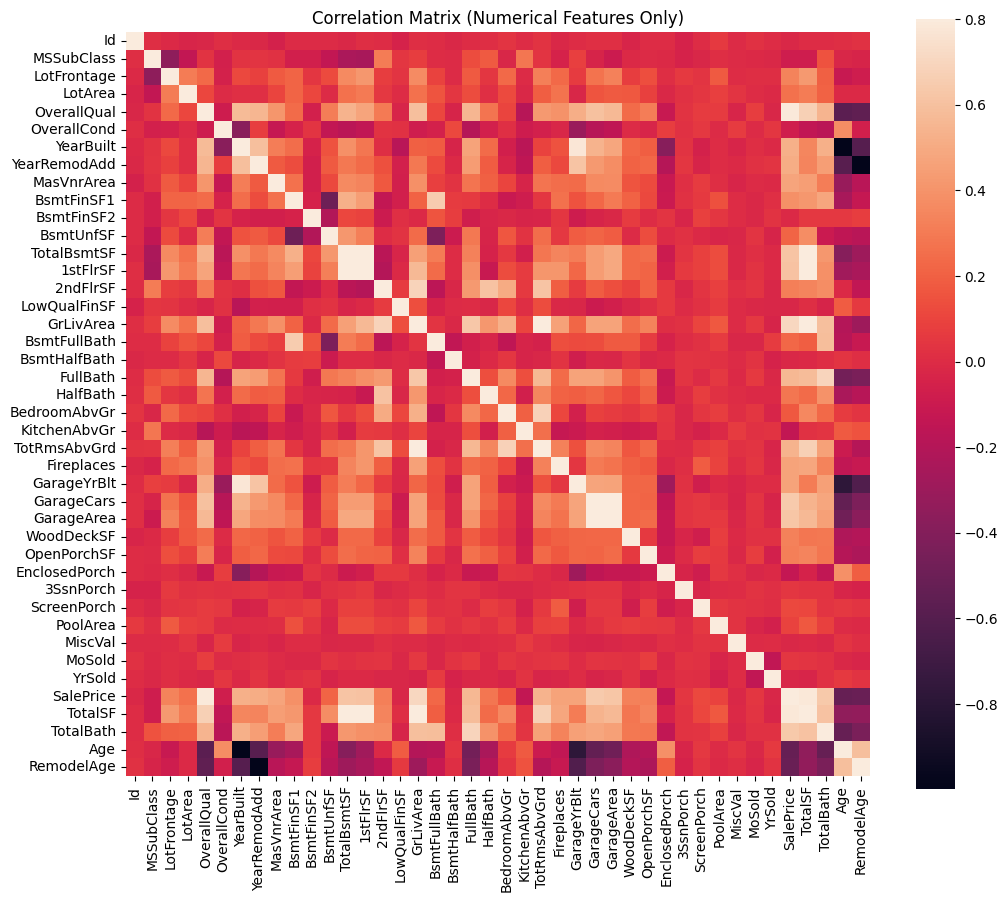

In [ ]:
plt.figure(figsize=(12, 10))
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = train_data[numerical_cols].corr()
sns.heatmap(corr_matrix, vmax=0.8, square=True)
plt.title('Correlation Matrix (Numerical Features Only)')
plt.show()

In [309]:
top_corr = corr_matrix['SalePrice'].sort_values(ascending=False).head(15)
print("Top correlated numerical features with SalePrice:")
print(top_corr)

Top correlated numerical features with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
TotalSF         0.782260
GrLivArea       0.708624
GarageCars      0.640409
TotalBath       0.631731
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
Fireplaces      0.466929
Name: SalePrice, dtype: float64


In [310]:
X = train_data.drop(['Id', 'SalePrice'], axis=1)
y = np.log(train_data['SalePrice'])  # Log transform for normality

In [311]:
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [312]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output = False)
# encoder.set_output(transform = 'pandas')

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', encoder)])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)])

In [313]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [314]:
models = {
    'Ridge Regression (α=1)': Ridge(alpha=1.0),
     'Lasso Regression (α=0.001)': Lasso(alpha=0.001),
     'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

In [315]:
results = {}
pipes = {}
for name, model in models.items():
    # Create pipeline (skip scaling for Random Forest)
    if 'Random Forest' in name:
        # Random Forest doesn't need feature scaling
        pipe = Pipeline(steps=[
            ('preprocessor', ColumnTransformer(
                transformers=[
                    ('num', SimpleImputer(strategy='median'), num_cols),
                    ('cat', categorical_transformer, cat_cols)])),
            ('regressor', model)])
    else:
        pipe = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', model)])
    pipes[name] = pipe

In [316]:
def loss_function(y_true, y_pred):
    return np.sqrt(mean_squared_error(np.log(y_true), np.log(y_pred)))

In [317]:
y_test

892     11.947949
1105    12.691580
413     11.652687
522     11.976659
1036    12.661914
          ...    
479     11.401670
1361    12.468437
802     12.149502
651     11.589887
722     11.732061
Name: SalePrice, Length: 292, dtype: float64

In [329]:
for model_name, pipe in pipes.items():
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'R2': r2}

In [330]:
results

{'Ridge Regression (α=1)': {'RMSE': 0.1311565517476076,
  'R2': 0.9078199627345758},
 'Lasso Regression (α=0.001)': {'RMSE': 0.13750331161893348,
  'R2': 0.8986827916664777},
 'Random Forest': {'RMSE': 0.1447984237069364, 'R2': 0.8876470273704301}}

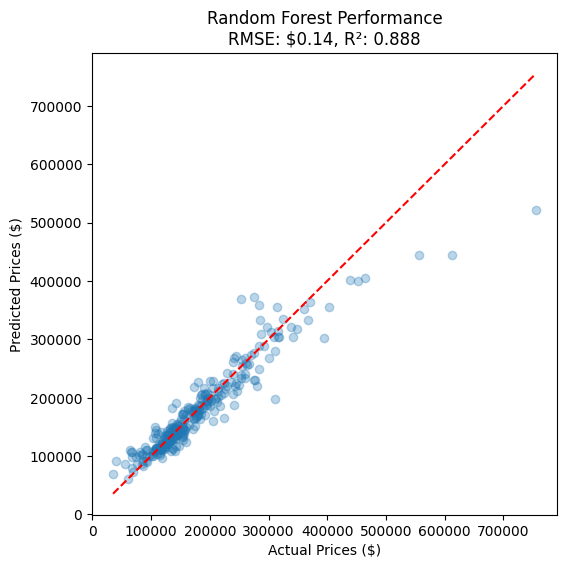

In [331]:
plt.figure(figsize=(6, 6))
plt.scatter(np.exp(y_test), np.exp(y_pred), alpha=0.3)
plt.plot([min(np.exp(y_test)), max(np.exp(y_test))],[min(np.exp(y_test)), max(np.exp(y_test))], 'r--')
plt.xlabel('Actual Prices ($)')
plt.ylabel('Predicted Prices ($)')
plt.title(f'{name} Performance\nRMSE: ${rmse:.2f}, R²: {r2:.3f}')
plt.show()

In [332]:
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df.sort_values('RMSE'))


Model Performance Comparison:
                                RMSE        R2
Ridge Regression (α=1)      0.131157  0.907820
Lasso Regression (α=0.001)  0.137503  0.898683
Random Forest               0.144798  0.887647


In [334]:
best_model = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', SimpleImputer(strategy='median'), num_cols),
            ('cat', categorical_transformer, cat_cols)])),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

In [335]:
best_model.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'Fu...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [336]:
test_ids = test_data['Id']
test_X = test_data.drop('Id', axis=1)

In [337]:
test_preds = np.exp(best_model.predict(test_X))

In [339]:
submission = pd.DataFrame({'Id': test_ids, 'SalePrice': test_preds})
submission.to_csv('submission.csv', index=False)
print("\nSubmission file created using Random Forest!")


Submission file created using Random Forest!


In [340]:
import dagshub
dagshub.init(repo_owner='giorgitorro', repo_name='HousePricesRegression_gtoro22', mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=23cbd10e-8cdc-48b9-b477-19d8e71ac0af&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=e69837ad67088beb9ef3b2682259fe174493dcdd2acfaaa09fd245ee71947e9a




Accessing as giorgitorro

Initialized MLflow to track repo "giorgitorro/HousePricesRegression_gtoro22"

Repository giorgitorro/HousePricesRegression_gtoro22 initialized!

In [343]:
results

{'Ridge Regression (α=1)': {'RMSE': 0.1311565517476076,
  'R2': 0.9078199627345758},
 'Lasso Regression (α=0.001)': {'RMSE': 0.13750331161893348,
  'R2': 0.8986827916664777},
 'Random Forest': {'RMSE': 0.1447984237069364, 'R2': 0.8876470273704301}}

In [346]:
import mlflow
mlflow.set_experiment("Ridge Regression")
with mlflow.start_run(run_name = 'run_1'):
  mlflow.log_param('model name', 'ridge')

  mlflow.log_metric('rmse', results['Ridge Regression (α=1)']['RMSE'])
  mlflow.log_metric('R2', results['Ridge Regression (α=1)']['R2'])  
  mlflow.sklearn.log_model(
        sk_model=pipes['Ridge Regression (α=1)'],
        artifact_path="Ridge_model",     
    )

2025/04/10 23:00:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run run_1 at: https://dagshub.com/giorgitorro/HousePricesRegression_gtoro22.mlflow/#/experiments/1/runs/4a72b695579b4ef1b5d5f030b474b802
🧪 View experiment at: https://dagshub.com/giorgitorro/HousePricesRegression_gtoro22.mlflow/#/experiments/1


In [347]:
mlflow.set_experiment("Lasso Regression")
with mlflow.start_run(run_name = 'run_2'):
  mlflow.log_param('model name', 'Lasso Regression')
  mlflow.log_param('α','0.001')
  mlflow.log_metric('rmse', results['Lasso Regression (α=0.001)']['RMSE'])
  mlflow.log_metric('R2', results['Lasso Regression (α=0.001)']['R2'])  
  mlflow.sklearn.log_model(
        sk_model=pipes['Lasso Regression (α=0.001)'],
        artifact_path="Lasso_Regression",     
    )

2025/04/10 23:14:52 INFO mlflow.tracking.fluent: Experiment with name 'Lasso Regression' does not exist. Creating a new experiment.
2025/04/10 23:14:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run run_2 at: https://dagshub.com/giorgitorro/HousePricesRegression_gtoro22.mlflow/#/experiments/2/runs/60b60365b4f543d48c3b6ccd9e340ef9
🧪 View experiment at: https://dagshub.com/giorgitorro/HousePricesRegression_gtoro22.mlflow/#/experiments/2


In [348]:
mlflow.set_experiment("Random Forest")
with mlflow.start_run(run_name = 'run_3'):
  mlflow.log_param('model name', 'Random Forest') 
  mlflow.log_param('depth','100' )
  mlflow.log_metric('rmse', results['Random Forest']['RMSE'])
  mlflow.log_metric('R2', results['Random Forest']['R2'])  
  mlflow.sklearn.log_model(
        sk_model=pipes['Random Forest'],
        artifact_path="Random_Forest",     
    )

2025/04/10 23:15:02 INFO mlflow.tracking.fluent: Experiment with name 'Random Forest' does not exist. Creating a new experiment.
2025/04/10 23:15:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run run_3 at: https://dagshub.com/giorgitorro/HousePricesRegression_gtoro22.mlflow/#/experiments/3/runs/dfd7c3bac28348e0868c593367f28675
🧪 View experiment at: https://dagshub.com/giorgitorro/HousePricesRegression_gtoro22.mlflow/#/experiments/3
